In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow 
from tqdm import tqdm
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
# from keras.preprocessing import image
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
# from image import ImageDataGenerator

In [16]:
# Read the labels.csv file and check shape and records
labels_all = pd.read_csv('/Users/sonya.cherepennikova/Downloads/archive-3/dogs.csv')
print(labels_all.shape)
labels_all

(9346, 3)


,filepaths,labels,data set
0,train/Afghan/001.jpg,Afghan,train
1,train/Afghan/002.jpg,Afghan,train
2,train/Afghan/003.jpg,Afghan,train
3,train/Afghan/004.jpg,Afghan,train
4,train/Afghan/005.jpg,Afghan,train
...,...,...,...
9341,valid/Yorkie/06.jpg,Yorkie,valid
9342,valid/Yorkie/07.jpg,Yorkie,valid
9343,valid/Yorkie/08.jpg,Yorkie,valid
9344,valid/Yorkie/09.jpg,Yorkie,valid


In [3]:
# Loading number or each breed
breed_all = labels_all['labels']
breed_count = breed_all.value_counts()
breed_all.unique()

array(['Afghan', 'African Wild Dog', 'Airedale', 'American Hairless',
       'American Spaniel', 'Basenji', 'Basset', 'Beagle',
       'Bearded Collie', 'Bermaise', 'Bichon Frise', 'Blenheim',
       'Bloodhound', 'Bluetick', 'Border Collie', 'Borzoi',
       'Boston Terrier', 'Boxer', 'Bull Mastiff', 'Bull Terrier',
       'Bulldog', 'Cairn', 'Chihuahua', 'Chinese Crested', 'Chow',
       'Clumber', 'Cockapoo', 'Cocker', 'Collie', 'Corgi', 'Coyote',
       'Dalmation', 'Dhole', 'Dingo', 'Doberman', 'Elk Hound',
       'French Bulldog', 'German Sheperd', 'Golden Retriever',
       'Great Dane', 'Great Perenees', 'Greyhound', 'Groenendael',
       'Irish Spaniel', 'Irish Wolfhound', 'Japanese Spaniel', 'Komondor',
       'Labradoodle', 'Labrador', 'Lhasa', 'Malinois', 'Maltese',
       'Mex Hairless', 'Newfoundland', 'Pekinese', 'Pit Bull',
       'Pomeranian', 'Poodle', 'Pug', 'Rhodesian', 'Rottweiler',
       'Saint Bernard', 'Schnauzer', 'Scotch Terrier', 'Shar_Pei',
       'Shiba In

In [54]:
# Selecting all breeds because i have high computation power
CLASS_NAME = ['Shiba Inu', 'Doberman', 'Siberian Husky', 'Corgi', 'Bichon Frise']
labels = labels_all[(labels_all['labels'].isin(CLASS_NAME))]
labels = labels.reset_index()
labels_train = labels[labels["data set"] == "train"]
labels_test = labels[labels["data set"] == "test"]
labels_valid = labels[labels["data set"] == "valid"]



In [57]:
# Creating numpy matrix with zeros
X_data_train = np.zeros((len(labels_train), 224, 224, 3), dtype='float32')
X_data_test = np.zeros((len(labels_test), 224, 224, 3), dtype='float32')
X_data_valid = np.zeros((len(labels_valid), 224, 224, 3), dtype='float32')
# One hot encoding
Y_data_train = label_binarize(labels_train['labels'], classes = CLASS_NAME)
Y_data_test = label_binarize(labels_test['labels'], classes = CLASS_NAME)
Y_data_valid = label_binarize(labels_valid['labels'], classes = CLASS_NAME)

# Reading and converting image to numpy array and normalizing dataset
for i in tqdm(range(len(labels_train))):
    img = image.load_img('/Users/sonya.cherepennikova/Downloads/archive-3/%s' % labels['filepaths'][i], target_size=(224, 224))
    img = image.img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data_train[i] = x / 255.0

# Reading and converting image to numpy array and normalizing dataset
for i in tqdm(range(len(labels_test))):
    img = image.load_img('/Users/sonya.cherepennikova/Downloads/archive-3/%s' % labels['filepaths'][i], target_size=(224, 224))
    img = image.img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data_test[i] = x / 255.0

# Reading and converting image to numpy array and normalizing dataset
for i in tqdm(range(len(labels_valid))):
    img = image.load_img('/Users/sonya.cherepennikova/Downloads/archive-3/%s' % labels['filepaths'][i], target_size=(224, 224))
    img = image.img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data_valid[i] = x / 255.0

# Printing train image and one hot encode shape & size
print('\nTrain Images shape: ',X_data_train.shape,' size: {:,}'.format(X_data_train.size))
print('One-hot encoded output shape: ',Y_data_train.shape,' size: {:,}'.format(Y_data_train.size))


100%|██████████| 50/50 [00:00<00:00, 1490.80it/s]


Train Images shape:  (515, 224, 224, 3)  size: 77,521,920
One-hot encoded output shape:  (515, 5)  size: 2,575


In [51]:


# Creating numpy matrix with zeros
X_data = np.zeros((len(labels), 224, 224, 3), dtype='float32')
# One hot encoding
Y_data = label_binarize(labels['labels'], classes=CLASS_NAME)

# Data Augmentation
datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Reading, augmenting, and converting image to numpy array and normalizing dataset
for i in tqdm(range(len(labels))):
    img = image.load_img('/Users/sonya.cherepennikova/Documents/pet project/dataset/train/%s.jpg' % labels['id'][i], target_size=(224, 224))
    img = image.img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)

    # Apply data augmentation
    for x_augmented in datagen.flow(x, batch_size=1):
        X_data[i] = x_augmented[0] / 255.0
        break

# Printing train image and one hot encode shape & size
print('\nTrain Images shape: ', X_data.shape, ' size: {:,}'.format(X_data.size))
print('One-hot encoded output shape: ', Y_data.shape, ' size: {:,}'.format(Y_data.size))


  0%|          | 0/615 [00:00<?, ?it/s]

KeyError: 'id'

In [58]:

# Building the Model
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu', input_shape = (224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 16, kernel_size = (7,7), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 8, kernel_size = (5,5), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(64, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(len(CLASS_NAME), activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

model.summary()

# model = Sequential()

# model.add(Conv2D(filters = 128, kernel_size = (3,3), activation ='relu', input_shape = (224,224,3)))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D(filters = 64, kernel_size = (3,3), activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Flatten())
# model.add(Dense(256, activation = "relu"))
# model.add(Dropout(0.5))
# model.add(Dense(128, activation = "relu"))
# model.add(Dropout(0.5))
# model.add(Dense(len(CLASS_NAME), activation = "softmax"))

# model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001), metrics=['accuracy'])

# model.summary()


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 220, 220, 64)   │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 110, 110, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 108, 108, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 48, 48, 16)     │        25,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 24, 24, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 20, 20, 8)      │         3,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 10, 10, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,749 (635.74 KB)

 Trainable params: 162,749 (635.74 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# # Splitting the data set into training and testing data sets
# X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size = 0.1)
# # Splitting the training data set into training and validation data sets
# X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.2)
X_train = X_data["dataset" == "train"]
X_test = X_data["dataset" == "test"]

In [29]:
X_train

array([], shape=(0, 615, 224, 224, 3), dtype=float32)

In [59]:
# Training the model
epochs = 2
batch_size = 128

history = model.fit(X_data_train, Y_data_train, batch_size = batch_size, epochs = epochs, validation_data = (X_data_valid, Y_data_valid))

Epoch 1/2
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.2218 - loss: 5.4044 - val_accuracy: 0.2400 - val_loss: 5.3594
Epoch 2/2
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.2219 - loss: 5.3381 - val_accuracy: 0.2200 - val_loss: 5.3033


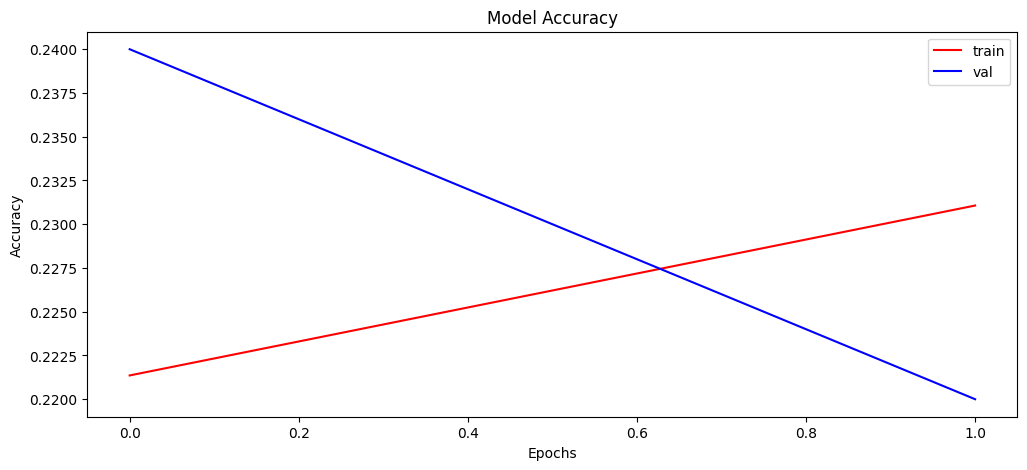

In [60]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [62]:
Y_pred = model.predict(X_data_test)
score = model.evaluate(X_data_test, Y_data_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x2eed7b560> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.2300 - loss: 5.3022
Accuracy over the test set: 
  22.0 %


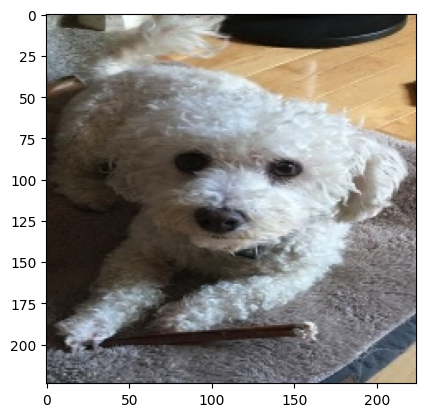

Originally :  Bichon Frise
Predicted :  Bichon Frise


In [79]:
# Plotting random image to compare
idx = random.randint(1, len(Y_data_test))
plt.imshow(X_data_test[idx,:,:,:])
plt.show()

# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",labels['labels'][np.argmax(Y_data_test[idx])])
print("Predicted : ",labels['labels'][np.argmax(Y_pred[idx])])

In [81]:
X_data_test

array([[[[0.8509804 , 0.6784314 , 0.0627451 ],
         [0.78039217, 0.62352943, 0.00784314],
         [0.7490196 , 0.6117647 , 0.01568628],
         ...,
         [0.8235294 , 0.7176471 , 0.03137255],
         [0.81960785, 0.72156864, 0.02352941],
         [0.8117647 , 0.72156864, 0.02352941]],

        [[0.8980392 , 0.72156864, 0.08235294],
         [0.83137256, 0.6666667 , 0.03921569],
         [0.7764706 , 0.64705884, 0.03921569],
         ...,
         [0.83137256, 0.7137255 , 0.03137255],
         [0.8117647 , 0.70980394, 0.03137255],
         [0.7921569 , 0.7058824 , 0.02352941]],

        [[0.9411765 , 0.74509805, 0.06666667],
         [0.85490197, 0.6862745 , 0.03137255],
         [0.78431374, 0.6666667 , 0.04705882],
         ...,
         [0.8392157 , 0.7137255 , 0.04313726],
         [0.79607844, 0.7019608 , 0.04313726],
         [0.7764706 , 0.6901961 , 0.04705882]],

        ...,

        [[0.23921569, 0.27058825, 0.03921569],
         [0.18431373, 0.23529412, 0.02352941]

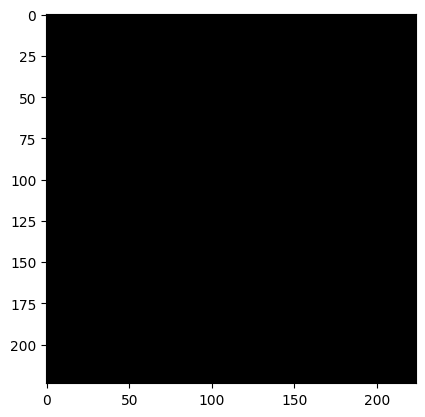

In [53]:
plt.imshow(X_data_test[13,:,:,:])